# 4 WTO 데이터 API 추출

- [1. 개요](#1.-개요)
- [2. 리스트 추출](#2.-리스트-추출)
- [3. 데이터 추출](#3.-데이터-추출)
- [부록: Indicator 리스트](#부록:-Indicator-리스트)

이 장에서는 세계무역기구(WTO: World Trade Organization)의 대표적인 API인 [Timeseries API](https://apiportal.wto.org/api-details#api=version1&operation=get-data-i-i)를 통해 데이터를 추출하는 방법을 소개한다.

*<span style="color:brown;">NOTE: 이 장에서 예시적으로 소개하는 모든 데이터 추출 작업은 WTO API 포털에서 자신의 인증키(subscription key)를 발급받아야만 실행된다.</span>*

## 1. 개요

[WTO API 포털](https://apiportal.wto.org/)에서는 다음과 같은 API를 제공한다.(API 키에 Sign Up만 하면 즉시 API를 무료로 사용할 수 있다.)

| 이름 | 설명 | 유형 |
|:----:|:-----|:----:|
| [ePing](https://apiportal.wto.org/api-details#api=eping) | ePing 웹사이트에 있는 SPS 및 TBT 알림을 반환한다.  | REST |
| [Quantitative Restrictions (QR)](https://apiportal.wto.org/api-details#api=quantitative-restrictions) | 관세 및 세금을 제외한 수출 및 수입 금지 및 제한에 대한 자세한 정보가 포함되어 있다. 조치가 적용되는 제품(관세품목)에 대한 세부 정보, 관련 WTO 정당성, 국가 법적 기반 등이 제공된다. | REST |
| [Timeseries API - v1](https://apiportal.wto.org/api-details#api=version1) | WTO 데이터 추출 API이다. JSON 또는 CSV 형식으로 더 큰 데이터 시리즈를 다운로드하거나 WTO 데이터를 웹페이지에 통합하는 데 사용할 수 있다. | REST |
| [Trade Facilitation Agreement Database (TFAD)](https://apiportal.wto.org/api-details#api=tfad) | 수입, 수출, 통과 절차에 대한 무역원활화협정 데이터베이스(TFAD: Trade Facilitation Agreement Database) 데이터를 반환한다. | REST |

### Timeseries API

WTO의 Timeseries API를 통해 WTO와 관련된 많은 통계 지표에 대한 데이터를 프로그래밍 방식으로 액세스할 수 있다. 사용 가능한 시계열 데이터는 상품 무역 및 서비스 무역 통계(연간, 분기별 및 월간), 시장접근(market access) 지표(양허, 실행, 특혜 관세), 비관세 정보 및 기타 지표를 포함한다.

[WTO Stats Portal](https://stats.wto.org/)을 통해 시계열 데이터를 대화형으로(interactively) 검색할 수 있으며, 거기에는 API query builder도 포함되어 있다.

### 가입 절차

1. WTO API 포털에서 [`Sign up`](https://apiportal.wto.org/signup)을 한 다음에 이메일 주소와 패스워드를 입력하고 `Sign in` 한다.
<br><br>
2. 오른쪽 위의 메뉴 중 `Products`로 들어가 `Standard`를 선택하고 구독명(subscription name)을 자신이 원하는 대로 입력한 다음, `Subscribe` 버튼을 누르면, 인증키(Primary key, Secondary key)가 제공된다.
<br><br>
3. 구독: Standard
    - 10초당 10회 호출 가능. 최대 10000회/시간.
    - 시계열 데이터(데이터 및 데이터_카운트) 제한: 1초당 1회 호출.
    - 구독은 무료다.

## 2. 리스트 추출

### 나라 (reporter)

In [1]:
import requests
import pandas as pd

# API 엔드포인트 URL
url = 'https://api.wto.org/timeseries/v1/reporters'

# subscription key
key = '89bad0ff4ff84d42a03cc001b2ef0cdc'

# 요청 파라미터 설정
params = {
   'max': 1000000,
}

headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': key,
}

# GET 요청을 보내고 응답 받기
response = requests.get(url, headers=headers, params=params)

# 응답 데이터를 데이터프레임으로 변환
data = response.json()
reporters = pd.DataFrame(data)
reporters

,code,iso3A,name,displayOrder
0,000,None,World,0
1,004,AFG,Afghanistan,10
2,950,None,Africa,20
3,962,None,"African, Caribbean and Pacific States (ACP)",30
4,986,None,"Africa, CIS and Middle East",35
...,...,...,...,...
286,886,None,"Yemen, Arab Republic of",3630
287,720,None,"Yemen, People's Democratic Republic",3640
288,890,YUG,"Yugoslavia, Socialist Federal Republic of",3650
289,894,ZMB,Zambia,3670


**나라 코드 찾기**

In [2]:
country = reporters[reporters['name'].str.contains('korea', case=False, na=False)]
country[['code', 'iso3A', 'name']]

,code,iso3A,name
136,408,PRK,"Korea, Democratic People's Republic of"
137,410,KOR,"Korea, Republic of"


### 지표 (indicator)

In [3]:
import requests
import pandas as pd

# API 엔드포인트 URL
url = 'https://api.wto.org/timeseries/v1/indicators'

# subscription key
key = '89bad0ff4ff84d42a03cc001b2ef0cdc'

# 요청 파라미터 설정
params = {
   'max': 1000000,
}

headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': key,
}

# GET 요청을 보내고 응답 받기
response = requests.get(url, headers=headers, params=params)

# 응답 데이터를 데이터프레임으로 변환
data = response.json()
indicators = pd.DataFrame(data)
indicators

,code,name,categoryCode,categoryLabel,subcategoryCode,subcategoryLabel,unitCode,unitLabel,startYear,endYear,...,numberReporters,numberPartners,productSectorClassificationCode,productSectorClassificationLabel,hasMetadata,numberDecimals,numberDatapoints,updateFrequency,description,sortOrder
0,TP_A_0010,MFN - Simple average duty,TPA,Tariff indicators - Applied,TPA_MFN,MFN - All products,PCT,Percent,2005,2023,...,167,NaN,None,None,No,1,2249,July,None,100
1,TP_A_0030,MFN - Trade weighted average duty,TPA,Tariff indicators - Applied,TPA_MFN,MFN - All products,PCT,Percent,0,2023,...,160,NaN,None,None,No,1,1878,July,None,101
2,TP_A_0040,MFN - Maximum duty,TPA,Tariff indicators - Applied,TPA_MFN,MFN - All products,PCT,Percent,2005,2023,...,167,NaN,None,None,No,0,2249,July,None,102
3,TP_A_0060,MFN - National peaks (greater than 3x nationa...,TPA,Tariff indicators - Applied,TPA_MFN,MFN - All products,PCT,Percent,2005,2023,...,167,NaN,None,None,No,1,2249,July,None,103
4,TP_A_0070,MFN - International peaks (greater than 15%),TPA,Tariff indicators - Applied,TPA_MFN,MFN - All products,PCT,Percent,2005,2023,...,167,NaN,None,None,No,1,2249,July,None,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,SER_FA_TUR_O,FATS - Sales by service sector (outward),SER_FA,Foreign affiliates statistics,None,None,USM,Million US dollar,1999,2021,...,38,NaN,ISIC4,FATS - ISIC Revision 4 (aggregates),Yes,0,9990,July,Outward Foreign Affiliates Statistics (FATS) c...,2902
245,SER_FA_NE_I,FATS - Number of foreign affiliates by service...,SER_FA,Foreign affiliates statistics,None,None,NUM,Number,2003,2022,...,47,NaN,ISIC4,FATS - ISIC Revision 4 (aggregates),Yes,0,19867,July,Inward Foreign Affiliates Statistics (FATS) co...,2903
246,SER_FA_NE_O,FATS - Number of foreign affiliates by service...,SER_FA,Foreign affiliates statistics,None,None,NUM,Number,2005,2021,...,37,NaN,ISIC4,FATS - ISIC Revision 4 (aggregates),Yes,0,12140,July,Outward Foreign Affiliates Statistics (FATS) c...,2904
247,SER_FA_EMP_I,FATS - Number of employees by service sector (...,SER_FA,Foreign affiliates statistics,None,None,NUS,Thousands,2002,2021,...,48,NaN,ISIC4,FATS - ISIC Revision 4 (aggregates),Yes,0,18546,July,Inward Foreign Affiliates Statistics (FATS) co...,2905


## 3. 데이터 추출

### 파라미터

| Name | In<br>위치 | Required<br>필수여부 | Type<br>유형 | 설명 |
|:-----:|:-----:|:-------:|:-------:|:------------|
| i    | query | true     | string  | 지표 코드 (Indicator code) |
| r    | query | false    | string  | Reporting 경제 (쉼표로 구분된 코드)  |
| p    | query | false    | string  | Partner 경제 (해당되는 경우, 쉼표로 구분된 코드)  |
| ps   | query | false    | string  | 기간 |
| pc   | query | false    | string  | 제품/부문 (해당되는 경우, 쉼표로 구분된 코드) |
| spc  | query | false    | boolean | 하위 제품/부문 포함 여부 |
| fmt  | query | false    | string  | 출력 형식 :<br>•`json` : json 콘텐츠 스트리밍<br>•`csv` : csv 파일 압축 및 압축 해제 |
| mode | query | false    | string  | 출력 모드 :<br>•`full` : 모든 열, 각 행에 정보 반복<br>•`codes` : 기술적(technical) 코드만 |
| dec  | query | false    | string  | 소수점 자리수 :<br>•`default` : 지표의 기본 소수점 자리수 적용<br>• N : 소수점 자리수를 N으로 설정 |
| off  | query | false    | integer | 건너뛸 레코드 수 (오프셋).<br>페이지 매김 구현에 사용 가능 |
| max  | query | false    | integer | 반환할 최대 레코드 수 (최대 1,000,000) |
| head | query | false    | string  | 제목 스타일 :<br>•`H` : 사람이 읽기 쉬운 제목, 특수 문자 및 공백 포함<br>•`M` : 기계가 읽기 쉬운 제목, 구문 분석 용이 |
| lang | query | false    | integer | 언어 ID: `1` 영어, `2` 프랑스어, `3` 스페인어|
| meta | query | false    | boolean | 메타데이터 정보 포함 |

**`ps` (time period) 파라미터**

| 기간 | 설명 |
|:--- |:--- |
| `default` (기본값) | 최근 8년. |
| `all` (전체) | 모든 연도. |
| YYYY | 연도를 쉼표로 구분해 입력함. 요청된 지표의 빈도가 월별 또는 분기별인 경우, 결과 출력은 이를 반영함. |
| YYYYQn | 연도 + 분기를 쉼표로 구분해 입력함. 지표 빈도가 월별인 경우, 월별로 출력됨. 예: 2010Q2는 4, 5, 6월을 출력함. |
| YYYYMM | 연도 + 월을 쉼표로 구분해 입력함. 예: 201007, 201507. |
| YYYY-YYYY | 연도의 범위. 예: 1995-2015. |
| YYYYQn-YYYYQn | 분기의 범위. 예: 2010Q1-2013Q3. |
| YYYYMM-YYYYMM | 월의 범위. 예: 201501-201606. |

**`pc` (products/sectors) 파라미터**

| 기간 | 설명 |
|:--- |:--- |
| `default` (기본값) | 지표 분류 상의 모든 제품/부문 코드를 포함 (HS 예외: 상위 2자리 제품 + 전체 챕터 01 포함). |
| `all` (전체) | 지표 분류 상의 모든 제품/부문 코드를 포함. |
| HS2, HS4, HS6 | 2자리, 4자리, 6자리 수준의 모든 HS 코드. |
| AG, AGFOFI, MAIS,... | 쉼표로 구분된 제품 코드 목록. |

###  예: 평균 실행관세율, 전세계

- `TP_A_0010`: MFN - Simple average duty
- `reporter`: all

In [4]:
import requests
import pandas as pd

# API 엔드포인트 URL
url = 'https://api.wto.org/timeseries/v1/data'

# subscription key
key = '89bad0ff4ff84d42a03cc001b2ef0cdc'

# 요청 파라미터 설정
params = {
    'i': 'TP_A_0010',
    'r': 'all',
    'p': 'default',
    'ps': 'default',
    'pc': 'default',
    'spc': 'false',
    'fmt': 'json',
    'mode': 'full',
    'dec': 'default',
    'off': 0,
    'max': 1000000,
    'head': 'H',
    'lang': '1',
    'meta': 'false'
}

headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': key,
}

# GET 요청을 보내고 응답 받기
response = requests.get(url, headers=headers, params=params)

# 응답 데이터를 데이터프레임으로 변환
data = response.json()
df = pd.DataFrame(data['Dataset'])
df

,IndicatorCategoryCode,IndicatorCategory,IndicatorCode,Indicator,ReportingEconomyCode,ReportingEconomy,PartnerEconomyCode,PartnerEconomy,ProductOrSectorClassificationCode,ProductOrSectorClassification,...,Period,FrequencyCode,Frequency,UnitCode,Unit,Year,ValueFlagCode,ValueFlag,TextValue,Value
0,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,004,Afghanistan,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2018,None,None,None,6.5
1,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,008,Albania,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2018,None,None,None,3.6
2,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,008,Albania,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2019,None,None,None,3.6
3,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,008,Albania,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2020,None,None,None,3.6
4,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,008,Albania,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2021,None,None,None,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,918,European Union,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2023,None,None,None,5.0
740,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,918,European Union,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2022,None,None,None,5.1
741,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,894,Zambia,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2023,None,None,None,14.6
742,TPA_MFN,MFN - All products,TP_A_0010,MFN - Simple average duty,894,Zambia,None,None,None,None,...,Annual,A,Annual,PCT,Percent,2022,None,None,None,14.6


###  예: 평균 실행관세율, 한미일중

- `TP_A_0010`: MFN - Simple average duty
- `reporter`: 410(한국), 840(미국), 392(일본), 156(중국)

In [5]:
import requests
import pandas as pd

# API 엔드포인트 URL
url = 'https://api.wto.org/timeseries/v1/data'

# subscription key
key = '89bad0ff4ff84d42a03cc001b2ef0cdc'

# 요청 파라미터 설정
params = {
    'i': 'TP_A_0030',
    'r': '410,840,392,156',
    'p': 'default',
    'ps': 'all',
    'pc': 'default',
    'spc': 'false',
    'fmt': 'json',
    'mode': 'full',
    'dec': 'default',
    'off': 0,
    'max': 1000000,
    'head': 'H',
    'lang': '1',
    'meta': 'false'
}

headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': key,
}

# GET 요청을 보내고 응답 받기
response = requests.get(url, headers=headers, params=params)

# 응답 데이터를 데이터프레임으로 변환
data = response.json()
data
df = pd.DataFrame(data['Dataset'])
df.shape, df.columns

((71, 23),
 Index(['IndicatorCategoryCode', 'IndicatorCategory', 'IndicatorCode',
        'Indicator', 'ReportingEconomyCode', 'ReportingEconomy',
        'PartnerEconomyCode', 'PartnerEconomy',
        'ProductOrSectorClassificationCode', 'ProductOrSectorClassification',
        'ProductOrSectorCode', 'ProductOrSector', 'PeriodCode', 'Period',
        'FrequencyCode', 'Frequency', 'UnitCode', 'Unit', 'Year',
        'ValueFlagCode', 'ValueFlag', 'TextValue', 'Value'],
       dtype='object'))

In [6]:
df[['Indicator', 'ReportingEconomy', 'Year', 'Value']]

,Indicator,ReportingEconomy,Year,Value
0,MFN - Trade weighted average duty,China,2006,4.7
1,MFN - Trade weighted average duty,China,2007,5.0
2,MFN - Trade weighted average duty,China,2008,4.5
3,MFN - Trade weighted average duty,China,2009,4.3
4,MFN - Trade weighted average duty,China,2010,4.1
...,...,...,...,...
66,MFN - Trade weighted average duty,United States of America,2019,2.3
67,MFN - Trade weighted average duty,United States of America,2020,2.4
68,MFN - Trade weighted average duty,United States of America,2021,2.3
69,MFN - Trade weighted average duty,United States of America,2022,2.2


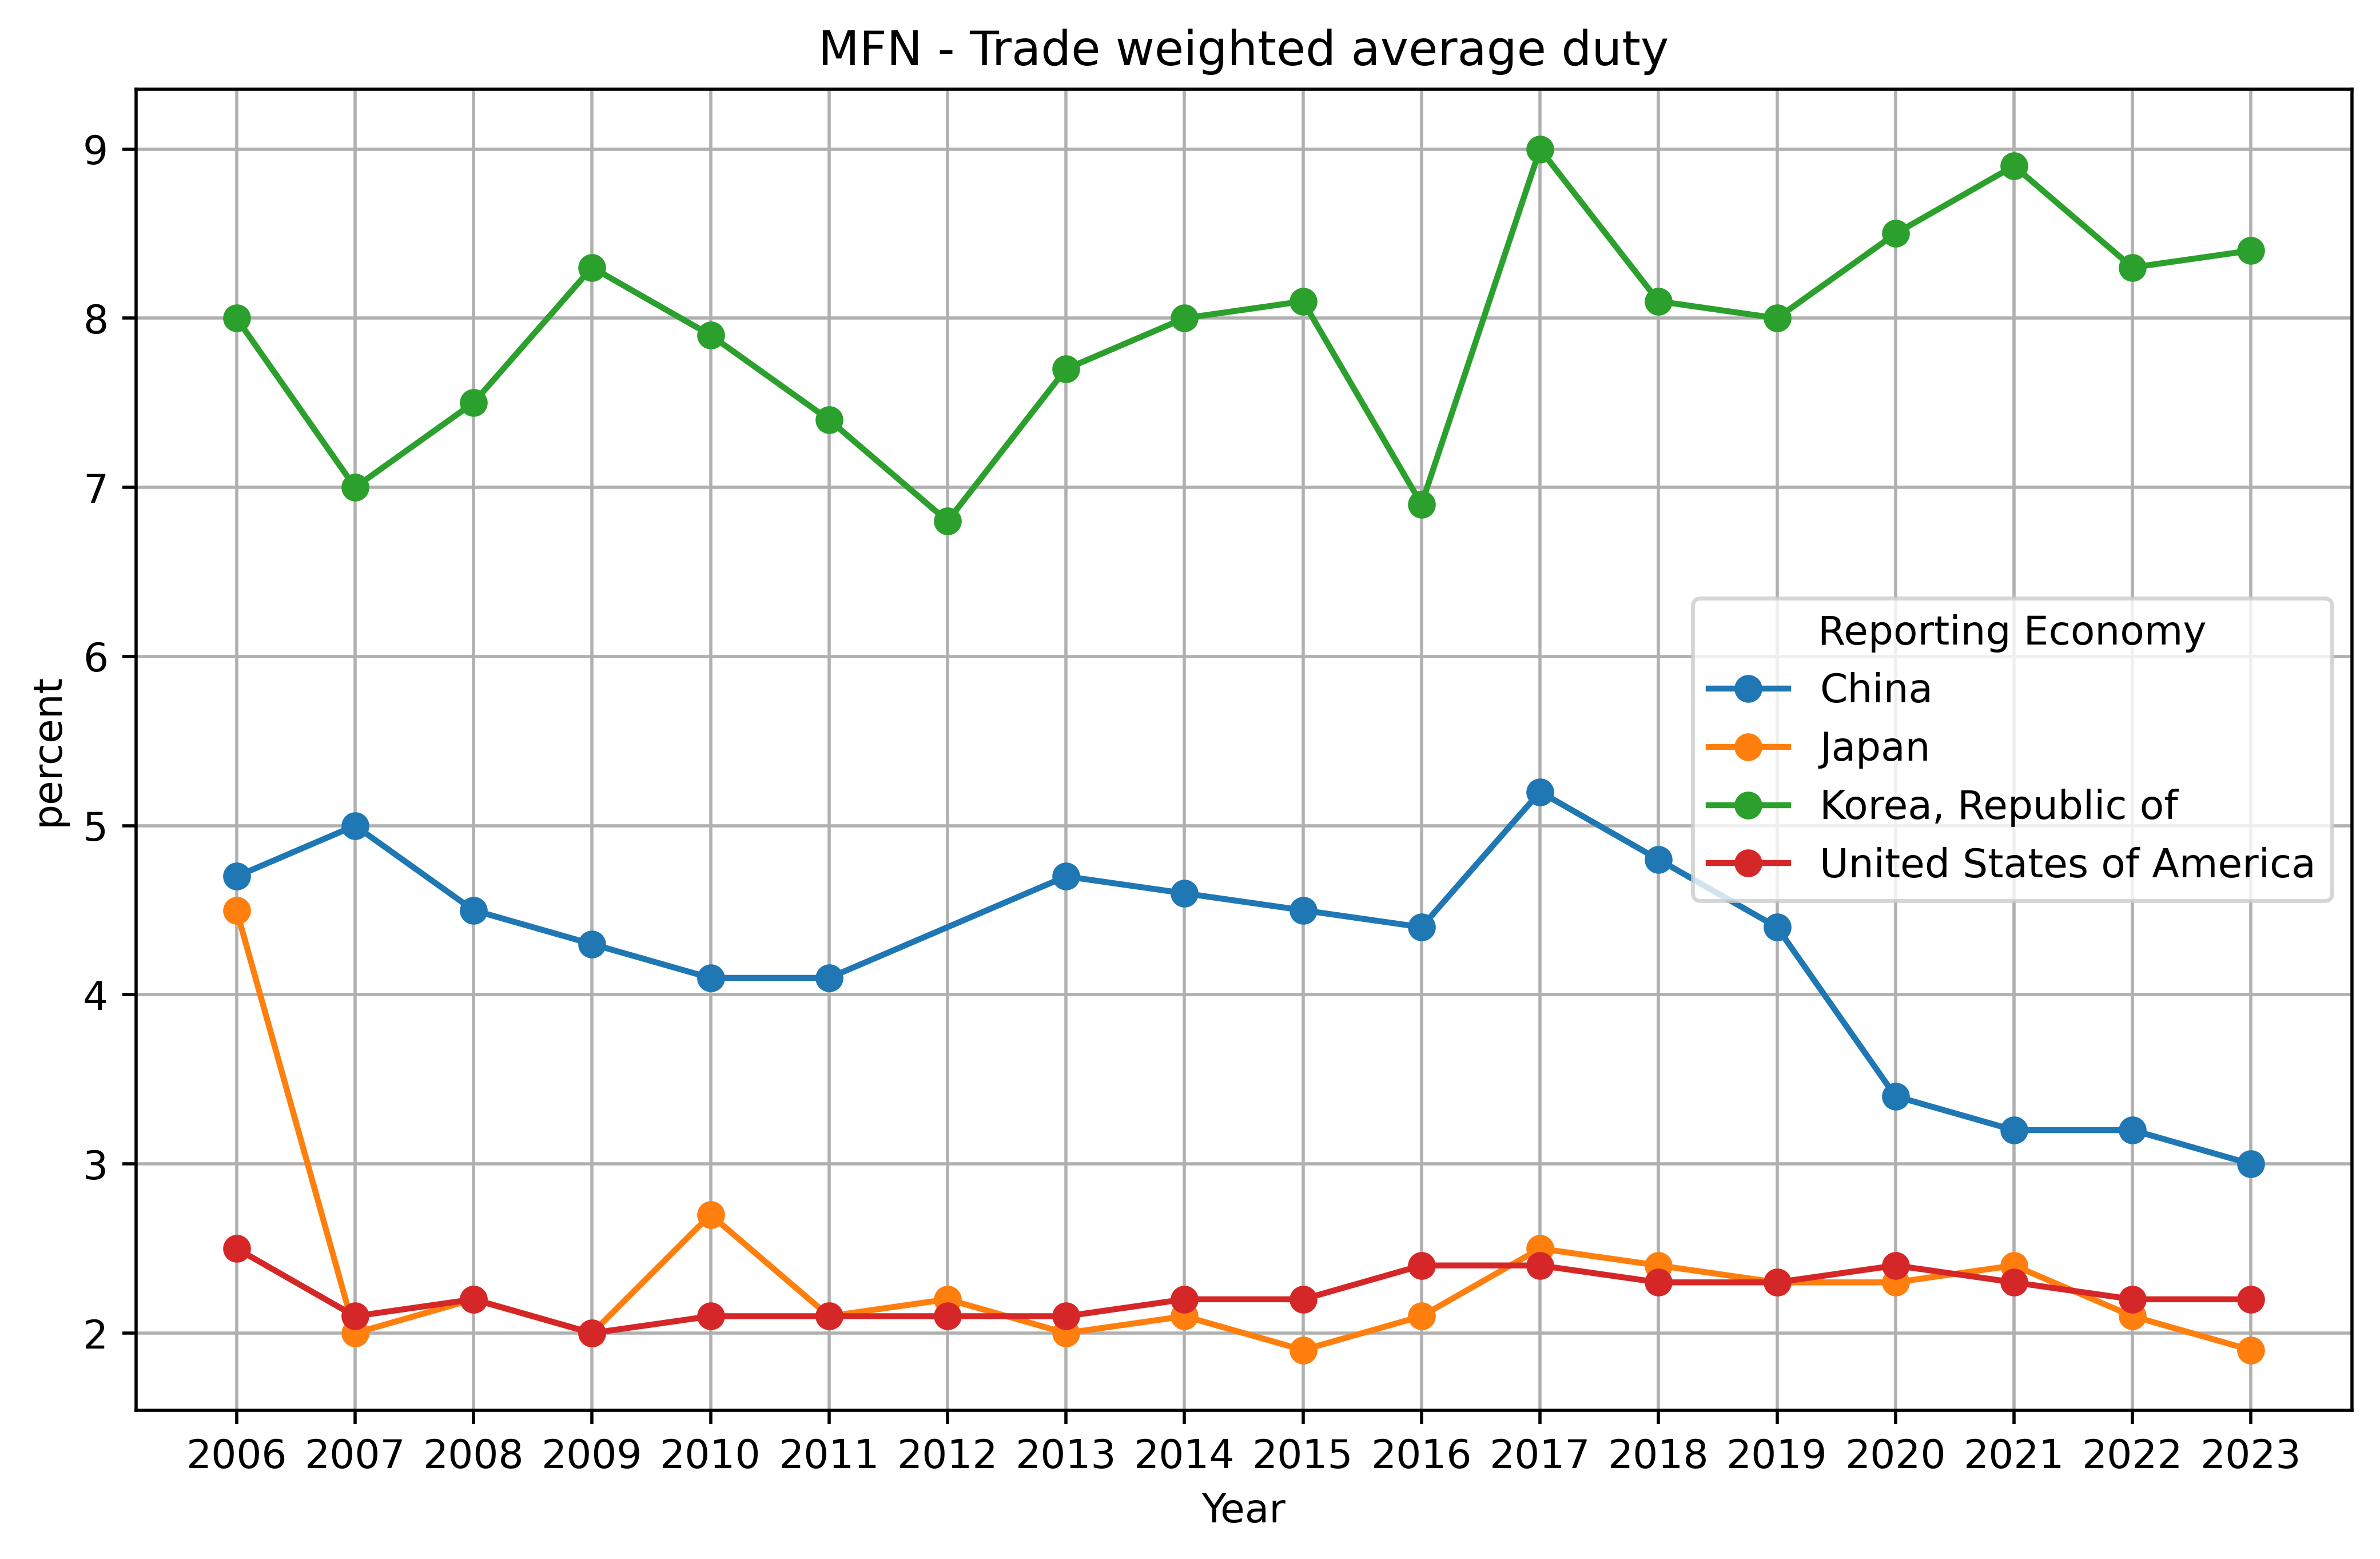

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 선그래프 그리기
plt.figure(figsize=(10,6), dpi=500)

for economy in df['ReportingEconomy'].unique():
    subset = df[df['ReportingEconomy'] == economy]
    plt.plot(subset['Year'], subset['Value'], marker='o', label=economy)

plt.title('MFN - Trade weighted average duty')
plt.xlabel('Year')
plt.ylabel('percent')
plt.legend(title='Reporting Economy')
plt.grid(True)
plt.xticks(ticks=df['Year'].astype(int).unique())
plt.show()

## 부록: Indicator 리스트

### [TPA] Tariff indicators - Applied

| 지표 ID | 설명 |
|:-------:|:------|
| TP_A_0010 | MFN - Simple average duty |
| TP_A_0030 | MFN - Trade weighted average duty |
| TP_A_0040 | MFN - Maximum duty |
| TP_A_0060 | MFN - National peaks (greater than 3x national average) |
| TP_A_0070 | MFN - International peaks (greater than 15%) |
| TP_A_0080 | MFN - Duty free |
| TP_A_0100 | MFN - Non ad valorem duties |
| TP_A_0110 | MFN - Imports duty free |
| TP_A_0130 | MFN - Coefficient of variation |
| TP_A_0140 | MFN - Number of distinct duty rates |
| TP_A_0150 | MFN - Number of applied tariff lines |
| TP_A_0160 | MFN AG - Simple average duty |
| TP_A_0170 | MFN AG - Trade weighted average duty |
| TP_A_0180 | MFN AG - Maximum duty |
| TP_A_0190 | MFN AG - Tariffs greater than 3* national average |
| TP_A_0200 | MFN AG - Tariffs greater than 15% |
| TP_A_0210 | MFN AG - Duty free |
| TP_A_0220 | MFN AG - Duties in duty range: 0 <= 5% |
| TP_A_0230 | MFN AG - Duties in duty range: 5% <= 10% |
| TP_A_0240 | MFN AG - Duties in duty range: 10% <= 15% |
| TP_A_0250 | MFN AG - Duties in duty range: 15% <= 25% |
| TP_A_0260 | MFN AG - Duties in duty range: 25% <= 50% |
| TP_A_0270 | MFN AG - Duties in duty range: 50% <= 100% |
| TP_A_0280 | MFN AG - Duties in duty range: > 100% |
| TP_A_0290 | MFN AG - Non ad valorem duties |
| TP_A_0300 | MFN AG - Imports duty free |
| TP_A_0310 | MFN AG - Imports in duty range: 0 <= 5% |
| TP_A_0320 | MFN AG - Imports in duty range: 5% <= 10% |
| TP_A_0330 | MFN AG - Imports in duty range: 10% <= 15% |
| TP_A_0340 | MFN AG - Imports in duty range: 15% <= 25% |
| TP_A_0350 | MFN AG - Imports in duty range: 25% <= 50% |
| TP_A_0360 | MFN AG - Imports in duty range: 50% <= 100% |
| TP_A_0370 | MFN AG - Imports in duty range: > 100% |
| TP_A_0380 | MFN AG - Imports facing non ad valorem duties |
| TP_A_0400 | MFN AG - Coefficient of variation |
| TP_A_0410 | MFN AG - Number of distinct duty rates |
| TP_A_0420 | MFN AG - Number of applied tariff lines |
| TP_A_0430 | MFN Non-AG - Simple average duty |
| TP_A_0440 | MFN Non-AG - Trade weighted average duty |
| TP_A_0450 | MFN Non-AG - Maximum duty |
| TP_A_0460 | MFN Non-AG - Tariffs greater than 3* national average |
| TP_A_0470 | MFN Non-AG - Tariffs greater than 15% |
| TP_A_0480 | MFN Non-AG - Duty free |
| TP_A_0490 | MFN Non-AG - Duties in duty range: 0 <= 5% |
| TP_A_0500 | MFN Non-AG - Duties in duty range: 5 <= 10% |
| TP_A_0510 | MFN Non-AG - Duties in duty range: 10 <= 15% |
| TP_A_0520 | MFN Non-AG - Duties in duty range: 15 <= 25% |
| TP_A_0530 | MFN Non-AG - Duties in duty range: 25 <= 50% |
| TP_A_0540 | MFN Non-AG - Duties in duty range: 50 <= 100% |
| TP_A_0550 | MFN Non-AG - Duties in duty range: > 100% |
| TP_A_0560 | MFN Non-AG - Non ad valorem duties |
| TP_A_0570 | MFN Non-AG - Imports duty free |
| TP_A_0580 | MFN Non-AG - Imports in duty range: 0 <= 5% |
| TP_A_0590 | MFN Non-AG - Imports in duty range: 5% <= 10% |
| TP_A_0600 | MFN Non-AG - Imports in duty range: 10 <= 15% |
| TP_A_0610 | MFN Non-AG - Imports in duty range: 15 <= 25% |
| TP_A_0620 | MFN Non-AG - Imports in duty range: 25 <= 50% |
| TP_A_0630 | MFN Non-AG - Imports in duty range: 50 <= 100% |
| TP_A_0640 | MFN Non-AG - Imports in duty range: > 100% |
| TP_A_0650 | MFN Non-AG - Imports facing non ad valorem duties |
| TP_A_0670 | MFN Non-AG - Coefficient of variation |
| TP_A_0680 | MFN Non-AG - Number of distinct duty rates |
| TP_A_0690 | MFN Non-AG - Number of applied tariff lines |
| TP_A_0020 | MFN - Simple average duty by product groups |
| TP_A_0050 | MFN - Maximum duty by product groups |
| TP_A_0090 | MFN - Duty free by product |
| TP_A_0120 | MFN - Imports duty free by product groups |
| TP_A_0390 | MFN - Imports by product groups |
| HS_A_0010 | HS MFN - Simple average ad valorem duty |
| HS_A_0015 | HS MFN - Simple average with ad valorem equivalents (AVE) |
| HS_A_0020 | HS MFN - Maximum ad valorem duty |
| HS_A_0025 | HS MFN - Maximum duty including ad valorem equivalents (AVE) |
| HS_A_0030 | HS MFN - Duty free |
| HS_A_0040 | HS MFN - Number of national tariff lines |
| HS_A_0050 | HS MFN - Number of NAV tariff lines |
| HS_P_0070 | HS Pref - Best preferential simple average ad valorem duty |

### [TPB] Tariff indicators - Bound

| 지표 ID | 설명 |
|:-------:|:------|
| TP_B_0020 | Bnd - Binding coverage |
| TP_B_0040 | Bnd - Concessions not yet implemented |
| TP_B_0050 | Bnd - Tariffs greater than 3* national average |
| TP_B_0060 | Bnd - Tariffs greater than 15% |
| TP_B_0070 | Bnd - Maximum duty |
| TP_B_0090 | Bnd - Simple average duty |
| TP_B_0110 | Bnd - Duty free |
| TP_B_0130 | Bnd - Non ad valorem duties |
| TP_B_0140 | Bnd - Coefficient of variation |
| TP_B_0150 | Bnd - Number of distinct duty rates |
| TP_B_0180 | Bnd AG - Simple average duty |
| TP_B_0200 | Bnd AG - Concessions not yet implemented |
| TP_B_0210 | Bnd AG - Tariffs greater than 3* national average |
| TP_B_0220 | Bnd AG - Tariffs greater than 15% |
| TP_B_0230 | Bnd AG - Maximum duty |
| TP_B_0240 | Bnd AG - Special Safeguards bound |
| TP_B_0250 | Bnd AG - Bound tariff quotas |
| TP_B_0260 | Bnd AG - Duty free |
| TP_B_0270 | Bnd AG - Duties in duty range: 0 <= 5 |
| TP_B_0280 | Bnd AG - Duties in duty range: 5 <= 10 |
| TP_B_0290 | Bnd AG - Duties in duty range: 10 <= 15 |
| TP_B_0300 | Bnd AG - Duties in duty range: 15 <= 25 |
| TP_B_0310 | Bnd AG - Duties in duty range: 25 <= 50 |
| TP_B_0320 | Bnd AG - Duties in duty range: 50 <= 100 |
| TP_B_0330 | Bnd AG - Duties in duty range: > 100 |
| TP_B_0340 | Bnd AG - Non ad valorem duties |
| TP_B_0350 | Bnd AG - AG -Coefficient of variation |
| TP_B_0360 | Bnd AG - Number of distinct duty rates |
| TP_B_0380 | Bnd Non-AG - Simple average duty |
| TP_B_0390 | Bnd Non-AG - Binding coverage |
| TP_B_0400 | Bnd Non-AG - Concessions not yet implemented |
| TP_B_0410 | Bnd Non-AG - Tariffs greater than 3* national average |
| TP_B_0420 | Bnd Non-AG - Tariffs greater than 15% |
| TP_B_0430 | Bnd Non-AG - Maximum duty |
| TP_B_0440 | Bnd Non-AG - Duty free |
| TP_B_0450 | Bnd Non-AG - Duties in duty range: 0 <= 5 |
| TP_B_0460 | Bnd Non-AG - Duties in duty range: 5 <= 10 |
| TP_B_0470 | Bnd Non-AG - Duties in duty range: 10 <= 15 |
| TP_B_0480 | Bnd Non-AG - Duties in duty range: 15 <= 25 |
| TP_B_0490 | Bnd Non-AG - Duties in duty range: 25 <= 50 |
| TP_B_0500 | Bnd Non-AG - Duties in duty range: 50 <= 100 |
| TP_B_0510 | Bnd Non-AG - Duties in duty range: > 100 |
| TP_B_0520 | Bnd Non-AG - Non ad valorem duties |
| TP_B_0530 | Bnd Non-AG - Coefficient of variation |
| TP_B_0540 | Bnd Non-AG - Number of distinct duty rates |
| TP_B_0030 | Bnd - Binding coverage by product groups |
| TP_B_0080 | Bnd - Maximum duty by product groups |
| TP_B_0100 | Bnd - Simple average duty by product groups |
| TP_B_0120 | Bnd - Duty free by product groups |
| HS_B_0010 | HS Bnd - Simple average ad valorem duty |
| HS_B_0020 | HS Bnd - Maximum ad valorem duty |
| HS_B_0030 | HS Bnd - Duty free |
| HS_B_0050 | HS Bnd - Number of national tariff lines |
| HS_B_0060 | HS Bnd - Number of NAV tariff lines |
| HS_B_0070 | HS ODC - Dutiable tariff lines |
| HS_B_0080 | HS ODC - AVG ad valorem duty |
| HS_B_0090 | HS ODC - Number of NAV tariff lines |

### [TPE] Export perspective in top 5 markets

| 지표 ID | 설명 |
|:-------:|:------|
| TP_E_0100 | AG - Partner rank based on exports value to partner |
| TP_E_0110 | AG - Trade weighted average preferential duty faced |
| TP_E_0120 | AG - Trade weighted average MFN applied duty faced |
| TP_E_0130 | AG - Simple average MFN applied duty faced |
| TP_E_0140 | AG - Trade weighted average preferential margin faced |
| TP_E_0150 | AG - Value of exports to partner (imports by partner) |
| TP_E_0160 | AG - Share of duty free exports to partner |
| TP_E_0170 | AG - Share of duty free tariff lines exported to partner |
| TP_E_0180 | AG - HS chapters exported to partner |
| TP_E_0190 | AG - HS subheadings exported to partner |
| TP_E_0200 | Non-AG - Rank based on exports value to partner |
| TP_E_0210 | Non-AG - Trade weighted average preferential duty faced |
| TP_E_0220 | Non-AG - Trade weighted average MFN applied duty faced |
| TP_E_0230 | Non-AG - Simple average MFN applied duty faced |
| TP_E_0240 | Non-AG - Trade weighted average preferential margin |
| TP_E_0250 | Non-AG - Value of exports to partner (imports by partner) |
| TP_E_0260 | Non-AG - Share of duty free exports to partner |
| TP_E_0270 | Non-AG - Share of duty free tariff lines exported to partner |
| TP_E_0280 | Non-AG - HS chapters exported to partner |
| TP_E_0290 | Non-AG - HS subheadings exported to partner |

### [NTM] Non-tariff measures indicators

| 지표 ID | 설명 |
|:-------:|:------|
| TP_N_1010 | ADP final measures in force (cumulated) |
| TP_N_1020 | ADP measures initiated |
| TP_N_1030 | ADP final measures implemented |
| TP_N_1040 | ADP final measures withdrawn |
| TP_N_1050 | ADP final measures in force (cumulated) - faced by exporter |
| TP_N_1060 | ADP measures initiated - faced by exporter |
| TP_N_1070 | ADP final measures implemented - faced by exporter |
| TP_N_1080 | ADP final measures withdrawn - faced by exporter |
| TP_N_1090 | ADP final measures in force (cumulated) by partners |
| TP_N_1100 | ADP measures initiated by partners |
| TP_N_1110 | ADP final measures implemented by partners |
| TP_N_1120 | ADP final measures withdrawn by partners |
| TP_N_1130 | ADP final measures in force (cumulated) by product groups |
| TP_N_1140 | ADP measures initiated by product groups |
| TP_N_1150 | ADP final measures implemented by product groups |
| TP_N_1160 | ADP final measures withdrawn by product groups |
| TP_N_1170 | ADP final measures in force (cumulated) by product groups - faced by exporter |
| TP_N_1180 | ADP measures initiated by product groups - faced by exporter |
| TP_N_1190 | ADP final measures implemented by product groups - faced by exporter |
| TP_N_1200 | ADP final measures withdrawn by product groups - faced by exporter |
| TP_N_2010 | CVD final measures in force (cumulated) |
| TP_N_2020 | CVD measures initiated |
| TP_N_2030 | CVD final measures implemented |
| TP_N_2040 | CVD final measures withdrawn |
| TP_N_2050 | CVD final measures in force (cumulated) - faced by exporter |
| TP_N_2060 | CVD measures initiated - faced by exporter |
| TP_N_2070 | CVD final measures implemented - faced by exporter |
| TP_N_2080 | CVD final measures withdrawn - faced by exporter |
| TP_N_2090 | CVD final measures in force (cumulated) by partners |
| TP_N_2100 | CVD measures initiated by partners |
| TP_N_2110 | CVD final measures implemented by partners |
| TP_N_2120 | CVD final measures withdrawn by partners |
| TP_N_2130 | CVD final measures in force (cumulated) by product groups |
| TP_N_2140 | CVD measures initiated by product groups |
| TP_N_2150 | CVD final measures implemented by product groups |
| TP_N_2160 | CVD final measures withdrawn by product groups |
| TP_N_2170 | CVD final measures in force (cumulated) by product groups - faced by exporter |
| TP_N_2180 | CVD measures initiated by product groups - faced by exporter |
| TP_N_2190 | CVD final measures implemented by product groups - faced by exporter |
| TP_N_2200 | CVD final measures withdrawn by product groups - faced by exporter |
| TP_N_3010 | SG final measures in force (cumulated) |
| TP_N_3020 | SG measures initiated |
| TP_N_3030 | SG final measures implemented |
| TP_N_3040 | SG final measures withdrawn |
| TP_N_3050 | SG final measures in force (cumulated) by product groups |
| TP_N_3060 | SG measures initiated by product groups |
| TP_N_3070 | SG final measures implemented by product groups |
| TP_N_3080 | SG final measures withdrawn by product groups |
| TP_N_4010 | SPS measures notified |
| TP_N_4020 | SPS measures notified (cumulated) |
| TP_N_5010 | TBT measures notified |
| TP_N_5020 | TBT measures notified (cumulated) |

### [ITS] International trade statistics

| 지표 ID | 설명 |
|:-------|:------|
| ITS_MTV_AX | Merchandise exports by product group – annual |
| ITS_MTV_AM | Merchandise imports by product group – annual |
| ITS_MTV_QX | Total merchandise exports - quarterly |
| ITS_MTV_QM | Total merchandise imports - quarterly |
| ITS_MTV_MX | Total merchandise exports - monthly |
| ITS_MTV_MM | Total merchandise imports - monthly |
| ITS_MTP_AX | Merchandise export value chained indices - annual |
| ITS_MTP_AM | Merchandise import value chained indices - annual |
| ITS_MTP_AXV | Merchandise export volume chained indices - annual |
| ITS_MTP_AMV | Merchandise import volume chained indices - annual |
| ITS_MTP_AUVX | Merchandise export unit value chained indices - annual |
| ITS_MTP_AUVM | Merchandise import unit value chained indices - annual |
| ITS_MTP_AXF | Merchandise export value fixed-base indices - annual |
| ITS_MTP_AMF | Merchandise import value fixed-base indices - annual |
| ITS_MTP_AXVF | Merchandise export volume fixed-base indices - annual |
| ITS_MTP_AMVF | Merchandise import volume fixed-base indices - annual |
| ITS_MTP_AUVXF | Merchandise export unit value fixed-base indices - annual |
| ITS_MTP_AUVMF | Merchandise import unit value fixed-base indices - annual |
| ITS_MTP_AXVG | Merchandise export volume change - annual |
| ITS_MTP_AMVG | Merchandise import volume change - annual |
| ITS_MTP_QXV | Merchandise export volume indices, not seasonally adjusted - quarterly |
| ITS_MTP_QMV | Merchandise import volume indices, not seasonally adjusted - quarterly |
| ITS_MTP_QXVSA | Merchandise export volume indices, seasonally adjusted - quarterly |
| ITS_MTP_QMVSA | Merchandise import volume indices, seasonally adjusted - quarterly |
| ITS_MTP_MXP | Export price changes of manufactured goods - monthly |
| ITS_MTP_MMP | Import price changes of manufactured goods - monthly |
| ITS_MTP_MXPM | Export price indices of manufactured goods - monthly |
| ITS_MTP_MMPM | Import price indices of manufactured goods - monthly |
| ITS_CS_AX6 | Commercial services exports by sector and partner – annual |
| ITS_CS_AM6 | Commercial services imports by sector and partner – annual |
| ITS_CS_AX5 | Commercial services exports by sector – annual (1980-2013) |
| ITS_CS_AM5 | Commercial services imports by sector – annual (1980-2013) |
| ITS_CS_QX | Commercial services exports by main sector – quarterly |
| ITS_CS_QM | Commercial services imports by main sector – quarterly |
| ITS_CS_MX | Commercial services exports of selected economies – monthly |
| ITS_CS_MM | Commercial services imports of selected economies – monthly |
| ITS_CS_MX_GR | Commercial services exports of selected economies (growth) – monthly |
| ITS_CS_MM_GR | Commercial services imports of selected economies (growth) – monthly |
| ITS_CS_QAX | Commercial services exports by main sector – preliminary annual estimates based on quarterly statistics (2005-2023) |
| ITS_CS_QAM | Commercial services imports by main sector – preliminary annual estimates based on quarterly statistics (2005-2023) |

### [SER_FA] Foreign affiliates statistics

| 지표 ID | 설명 |
|:-------|:------|
| SER_FA_TUR_I | FATS - Sales by service sector (inward) |
| SER_FA_TUR_O | FATS - Sales by service sector (outward) |
| SER_FA_NE_I | FATS - Number of foreign affiliates by service sector (inward) |
| SER_FA_NE_O | FATS - Number of foreign affiliates by service sector (outward) |
| SER_FA_EMP_I | FATS - Number of employees by service sector (inward) |
| SER_FA_EMP_O | FATS - Number of employees by service sector (outward) |

### [TPM_HS] Bilateral imports

| 지표 ID | 설명 |
|:------:|:------|
| HS_M_0020 | Bilateral imports by MTN product category |
| HS_M_0010 | Bilateral imports by detailed HS codes (2,4,6 digit) |

### [SER_BATIS] Balanced International Trade in Services

| 지표 ID | 설명 |
|:-------|:------|
| BAT_RV_X | Services exports: reported values |
| BAT_RV_M | Services imports: reported values |
| BAT_RVIE_X | Services exports: reported values including estimates |
| BAT_RVIE_M | Services imports: reported values including estimates |
| BAT_BV_X | Services exports: balanced values |
| BAT_BV_M | Services imports: balanced values |